In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def sigmoid_activation(x):
    return 1.0/(1+np.exp(-x))

def predict(X,W):
    preds = sigmoid_activation(X.dot(W))
    
    preds[preds<=0.5] = 0
    preds[preds>0] = 1
    
    return preds

In [24]:
def next_batch(X, y, batchSize):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i+batchSize], y[i:i+batchSize])

In [6]:
(X,y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)

In [14]:
y = y.reshape(y.shape[0],1)
y

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [15]:
X = np.c_[X, np.ones((X.shape[0]))]
X.shape

(1000, 3)

In [17]:
(trainX,testX,trainY,testY) = train_test_split(X, y, test_size=0.5, random_state=42)

In [28]:
W = np.random.randn(X.shape[1],1)
losses = []
epochs = 100
alpha = 0.01
batch_size = 32

In [30]:
for epoch in np.arange(0,epochs):
    epochLoss = []
    
    for (batchX, batchY) in next_batch(X,y,batch_size):
            preds = sigmoid_activation(batchX.dot(W))
            
            error = preds - batchY
            epochLoss.append(np.sum(error**2))
            
            gradient = batchX.T.dot(error)
            
            W+= -alpha * gradient
    
    loss = np.average(epochLoss)
    losses.append(loss)
    
    if epoch == 0 or (epoch+1) % 5 ==0:
        print(f"[INFO] epoch={epoch+1}, loss={loss}")


[INFO] epoch=1, loss=0.14443614158626564
[INFO] epoch=5, loss=0.02560732023875572
[INFO] epoch=10, loss=0.019245842854666746
[INFO] epoch=15, loss=0.016041853170907477
[INFO] epoch=20, loss=0.013941631987535725
[INFO] epoch=25, loss=0.012401278355338993
[INFO] epoch=30, loss=0.011198995404492778
[INFO] epoch=35, loss=0.010222779961291914
[INFO] epoch=40, loss=0.009408170847757923
[INFO] epoch=45, loss=0.008714635864991665
[INFO] epoch=50, loss=0.008115010141514044
[INFO] epoch=55, loss=0.007590191142793433
[INFO] epoch=60, loss=0.007126233306440421
[INFO] epoch=65, loss=0.006712646414754768
[INFO] epoch=70, loss=0.006341344075457476
[INFO] epoch=75, loss=0.0060059648266532414
[INFO] epoch=80, loss=0.005701417540706765
[INFO] epoch=85, loss=0.0054235674998115175
[INFO] epoch=90, loss=0.005169013827361841
[INFO] epoch=95, loss=0.004934928055426667
[INFO] epoch=100, loss=0.004718934685957158


In [31]:
preds = predict(testX, W)
print(classification_report(testY,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



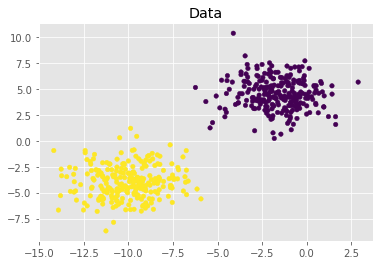

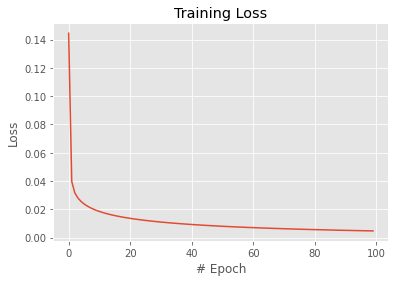

In [32]:
plt.style.use('ggplot')
plt.figure()
plt.title("Data")
plt.scatter(testX[:,0], testX[:,1], c=testY, s=20)

plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,epochs), losses)
plt.title("Training Loss")
plt.xlabel("# Epoch")
plt.ylabel("Loss")
plt.show()